In [73]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [74]:
dataset = pd.read_csv('../data/wine_quality/winequality-red.csv', sep=';')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

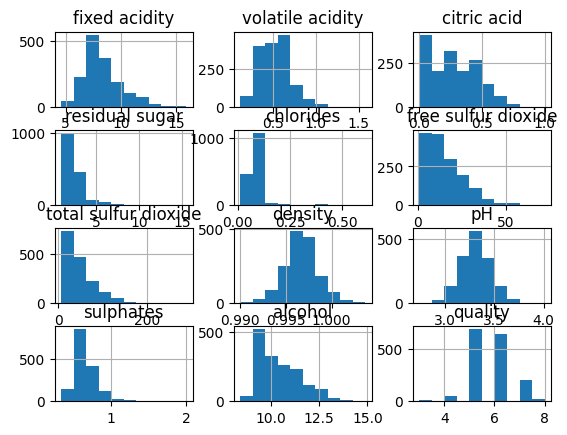

In [75]:
dataset.hist()

In [76]:
trainvalidation, test = train_test_split(dataset, test_size=0.3)
train, validation = train_test_split(trainvalidation, test_size=0.285)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

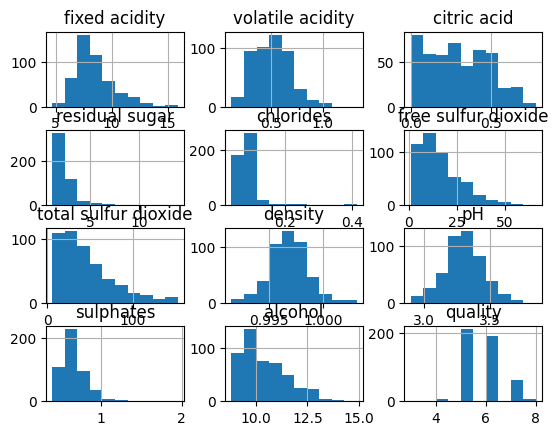

In [77]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# test.hist(ax=ax[0])
test.hist()
# dataset.hist(ax=ax[1])

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

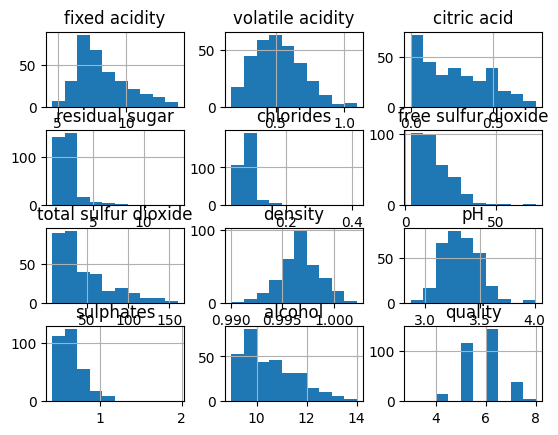

In [78]:
validation.hist()

In [79]:
dataset['quality'].value_counts()/len(dataset)

quality
5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: count, dtype: float64

In [80]:
test['quality'].value_counts()/len(test)

quality
5    0.439583
6    0.397917
7    0.131250
4    0.016667
8    0.012500
3    0.002083
Name: count, dtype: float64

In [81]:
validation['quality'].value_counts()/len(validation)

quality
6    0.448276
5    0.366771
7    0.119122
4    0.047022
8    0.015674
3    0.003135
Name: count, dtype: float64

In [82]:
# train_features = train.drop(columns=['quality'])
train_features = train.drop('quality', axis=1)
validation_features = validation.drop('quality', axis=1)
test_features = test.drop('quality', axis=1)
train_targets = train['quality']
test_targets = test['quality']
validation_targets = validation['quality']

In [83]:
def evaluate(model, final_eval=False):
    train_predictions = model.predict(train_features)
    validation_predictions = model.predict(validation_features)
    print("Train MAE:", mean_absolute_error(train_targets, train_predictions))
    print("Train MSE:", mean_squared_error(train_targets, train_predictions))
    print("Train R2:", r2_score(train_targets, train_predictions))

    print("Validation MAE:", mean_absolute_error(validation_targets, validation_predictions))
    print("Validation MSE:", mean_squared_error(validation_targets, validation_predictions))
    print("Validation R2:", r2_score(validation_targets, validation_predictions))

    if final_eval:
        test_predictions = model.predict(test_features)
        print("Test MAE:", mean_absolute_error(test_targets, test_predictions))
        print("Test MSE:", mean_squared_error(test_targets, test_predictions))
        print("Test R2:", r2_score(test_targets, test_predictions))


In [84]:
dt1 = DecisionTreeRegressor()
dt1.fit(train_features, train_targets)
evaluate(dt1)

Train MAE: 0.0
Train MSE: 0.0
Train R2: 1.0
Validation MAE: 0.5203761755485894
Validation MSE: 0.64576802507837
Validation R2: 0.025477518092300255


In [85]:
dt2 = DecisionTreeRegressor(max_depth=5)
dt2.fit(train_features, train_targets)
evaluate(dt2)

Train MAE: 0.4461963504428948
Train MSE: 0.32413327386284024
Train R2: 0.5188837588630655
Validation MAE: 0.5664713558869743
Validation MSE: 0.487076363441049
Validation R2: 0.2649576192293779


In [86]:
lr1 = LinearRegression()
lr1.fit(train_features, train_targets)
evaluate(lr1)

Train MAE: 0.49696680477356586
Train MSE: 0.4166914655576429
Train R2: 0.38149814354521605
Validation MAE: 0.5320826429882161
Validation MSE: 0.458564031021873
Validation R2: 0.30798531319230005


In [87]:

lr2 = LinearRegression(tol=1e-3)
lr2.fit(train_features, train_targets)
evaluate(lr2)

Train MAE: 0.49696680477356586
Train MSE: 0.4166914655576429
Train R2: 0.38149814354521605
Validation MAE: 0.5320826429882161
Validation MSE: 0.458564031021873
Validation R2: 0.30798531319230005


In [92]:
print('DecisionTreeRegressor:max_depth=5')
evaluate(dt2, final_eval=True)
print('LinearRegression')
evaluate(lr1, final_eval=True)

DecisionTreeRegressor:max_depth=5
Train MAE: 0.4461963504428948
Train MSE: 0.32413327386284024
Train R2: 0.5188837588630655
Validation MAE: 0.5664713558869743
Validation MSE: 0.487076363441049
Validation R2: 0.2649576192293779
Test MAE: 0.5360397246843445
Test MSE: 0.4643055308056508
Test R2: 0.22869610081385805
LinearRegression
Train MAE: 0.49696680477356586
Train MSE: 0.4166914655576429
Train R2: 0.38149814354521605
Validation MAE: 0.5320826429882161
Validation MSE: 0.458564031021873
Validation R2: 0.30798531319230005
Test MAE: 0.4976462161523106
Test MSE: 0.41180790420882374
Test R2: 0.3159051073959912


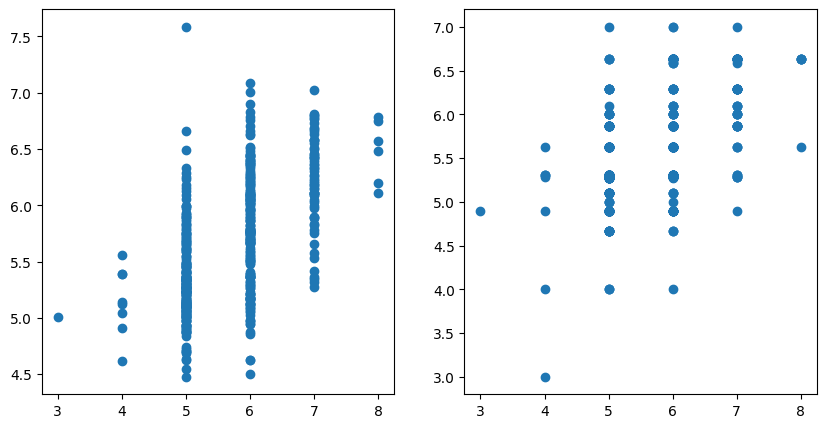

In [ ]:
# Plot the predictions of the two best models. Correct labels in the x-axis, predicted values in the y-axis
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
lr1_predictions = lr1.predict(test_features)
ax[0].scatter(test_targets, lr1_predictions)
dt2_predictions = dt2.predict(test_features)
ax[1].scatter(test_targets, dt2_predictions)

(array([ 1.,  0.,  0.,  7.,  0.,  0.,  3.,  0.,  0.,  7.,  5.,  4.,  0.,
        10.,  0.,  0., 25.,  0.,  0.,  1.]),
 array([4.89473684, 5.        , 5.10526316, 5.21052632, 5.31578947,
        5.42105263, 5.52631579, 5.63157895, 5.73684211, 5.84210526,
        5.94736842, 6.05263158, 6.15789474, 6.26315789, 6.36842105,
        6.47368421, 6.57894737, 6.68421053, 6.78947368, 6.89473684,
        7.        ]),
 <BarContainer object of 20 artists>)

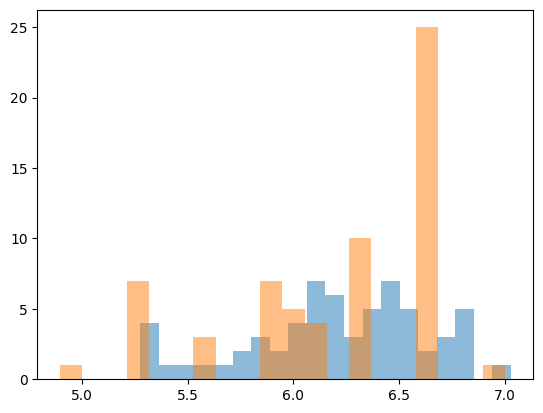

In [ ]:
# Compare the distribution of a single target value. 7 chosen as an example
lr1_predictions_7 = lr1_predictions[test_targets == 7]
dt2_predictions_7 = dt2_predictions[test_targets == 7]
# Plot using histograms. alpha=0.5 makes the bare transparent, bins=20 specifies the number of bins
plt.hist(lr1_predictions_7, alpha=0.5, bins=20)
plt.hist(dt2_predictions_7, alpha=0.5, bins=20)